# Credit Risk Dataset - Step-by-Step Cleaning Analysis
## Individual Plot Analysis with Before/After Comparisons

This notebook walks through each data cleaning step ONE AT A TIME, showing detailed visualizations before and after each transformation.

In [1]:
# Import required libraries
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


---
## STEP 1: Load the Dataset

In [2]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("busrapehlivan/credit-risk-dataset")

# Find the CSV file
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

# Load the dataset
df = pd.read_csv(csv_path)

print(f"✓ Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

100%|██████████| 368k/368k [00:00<00:00, 732kB/s]

Extracting files...
✓ Dataset loaded successfully!

Dataset Shape: 32581 rows × 12 columns

Columns in the dataset:
  1. person_age
  2. person_income
  3. person_home_ownership
  4. person_emp_length
  5. loan_intent
  6. loan_grade
  7. loan_amnt
  8. loan_int_rate
  9. loan_status
  10. loan_percent_income
  11. cb_person_default_on_file
  12. cb_person_cred_hist_length


In [3]:
# Display first few rows
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Basic information about the dataset
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Statistical summary
print("Statistical Summary of Numerical Columns:")
print("="*60)
df.describe()

Statistical Summary of Numerical Columns:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


---
---
# 🔍 STEP 2: ANALYZE MISSING VALUES
---

In [6]:
# Check for missing values
print("Missing Values Analysis:")
print("="*60)
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found!")

Missing Values Analysis:
           Column  Missing Count  Percentage
person_emp_length            895    2.747000
    loan_int_rate           3116    9.563856


### Plot 1: Missing Values Bar Chart

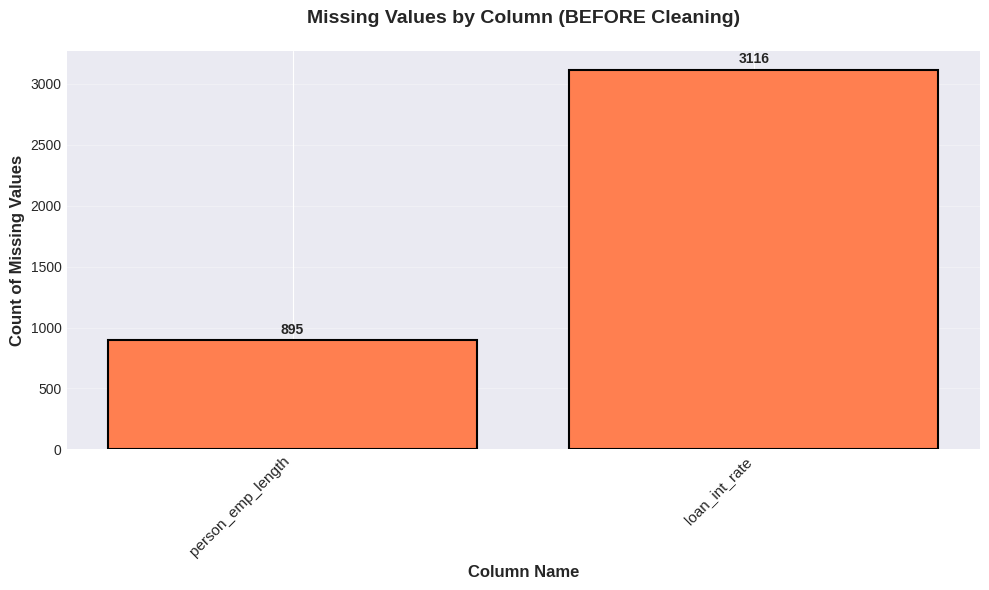


📊 Key Observation: person_emp_length has 895 missing values


In [7]:
# Visualize missing values
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

if len(missing_data) > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(missing_data)), missing_data.values, color='coral', edgecolor='black', linewidth=1.5)
    plt.xticks(range(len(missing_data)), missing_data.index, rotation=45, ha='right', fontsize=11)
    plt.ylabel('Count of Missing Values', fontsize=12, fontweight='bold')
    plt.xlabel('Column Name', fontsize=12, fontweight='bold')
    plt.title('Missing Values by Column (BEFORE Cleaning)', fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(missing_data.values):
        plt.text(i, v + max(missing_data.values)*0.01, str(v),
                ha='center', va='bottom', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

    print(f"\n📊 Key Observation: {missing_data.index[0]} has {missing_data.values[0]} missing values")
else:
    print("No missing values to visualize!")

---
---
# 🔧 STEP 3: FIX LOAN INTEREST RATE - MISSING VALUES
---

## Why are we doing this?
- **loan_int_rate** is a critical feature for credit risk assessment
- Missing values will cause problems in machine learning models
- We need to fill these missing values intelligently

## Why use MEDIAN instead of MEAN?
- Financial data like interest rates are often **skewed** (not normally distributed)
- **Median** is robust to outliers and extreme values
- **Mean** can be heavily influenced by very high or very low rates
- Median represents the "typical" interest rate better

### Plot 2: Distribution of Loan Interest Rate (BEFORE Imputation)

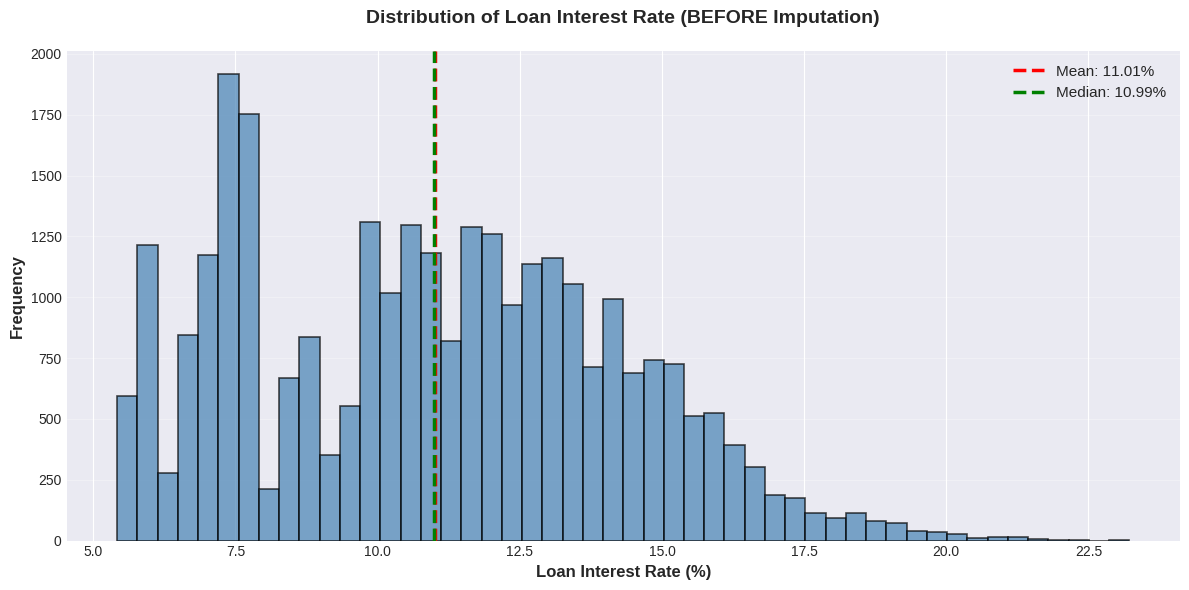


📊 Statistics BEFORE Imputation:
   Mean:     11.01%
   Median:   10.99%
   Std Dev:  3.24%
   Skewness: 0.21
   Missing:  3116 values

💡 Notice: The distribution is slightly skewed, so median is a better choice!


In [8]:
# Analyze loan interest rate before imputation
valid_rates = df['loan_int_rate'].dropna()

plt.figure(figsize=(12, 6))
plt.hist(valid_rates, bins=50, color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.axvline(valid_rates.mean(), color='red', linestyle='--', linewidth=2.5,
            label=f'Mean: {valid_rates.mean():.2f}%')
plt.axvline(valid_rates.median(), color='green', linestyle='--', linewidth=2.5,
            label=f'Median: {valid_rates.median():.2f}%')
plt.xlabel('Loan Interest Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Loan Interest Rate (BEFORE Imputation)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Statistics BEFORE Imputation:")
print(f"   Mean:     {valid_rates.mean():.2f}%")
print(f"   Median:   {valid_rates.median():.2f}%")
print(f"   Std Dev:  {valid_rates.std():.2f}%")
print(f"   Skewness: {valid_rates.skew():.2f}")
print(f"   Missing:  {df['loan_int_rate'].isnull().sum()} values")
print(f"\n💡 Notice: The distribution is slightly skewed, so median is a better choice!")

### Now let's perform the imputation...

In [9]:
# Store the median value
median_rate = df['loan_int_rate'].median()
missing_count = df['loan_int_rate'].isnull().sum()

# Perform imputation
df['loan_int_rate'].fillna(median_rate, inplace=True)

print(f"✅ IMPUTATION COMPLETED!")
print(f"   Filled {missing_count} missing values with median: {median_rate:.2f}%")
print(f"   Verification: Missing values remaining: {df['loan_int_rate'].isnull().sum()}")

✅ IMPUTATION COMPLETED!
   Filled 3116 missing values with median: 10.99%
   Verification: Missing values remaining: 0


/tmp/ipython-input-3970271747.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(median_rate, inplace=True)


### Plot 3: Distribution of Loan Interest Rate (AFTER Imputation)

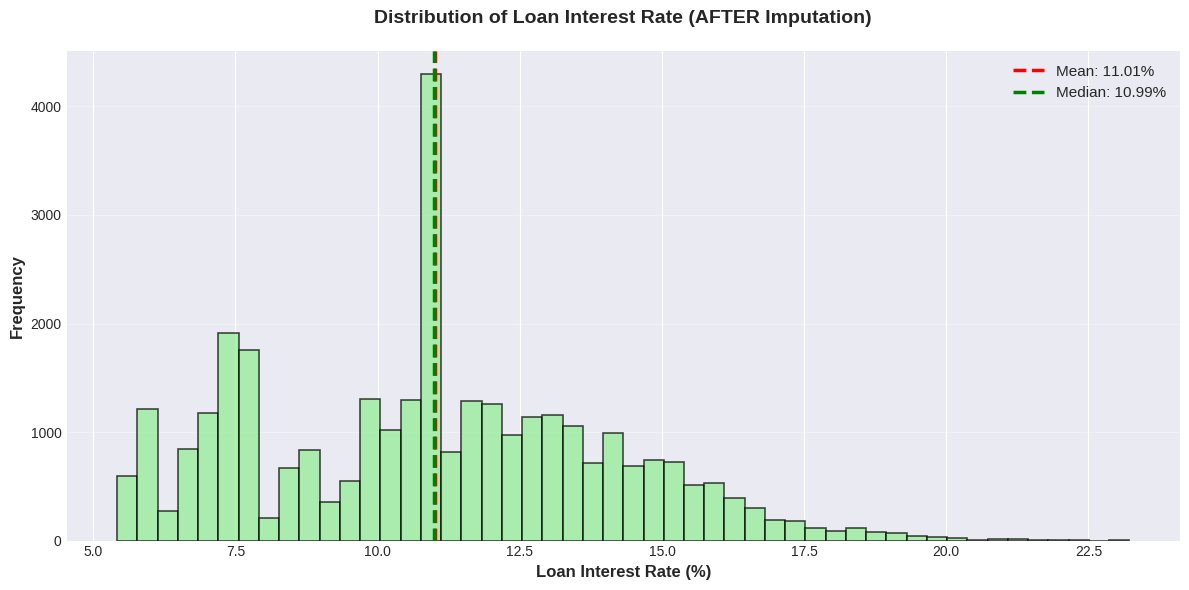


📊 Statistics AFTER Imputation:
   Mean:     11.01%
   Median:   10.99%
   Std Dev:  3.08%
   Missing:  0 values

✅ SUCCESS: All missing values have been filled!


In [10]:
# Visualize after imputation
plt.figure(figsize=(12, 6))
plt.hist(df['loan_int_rate'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.axvline(df['loan_int_rate'].mean(), color='red', linestyle='--', linewidth=2.5,
            label=f'Mean: {df["loan_int_rate"].mean():.2f}%')
plt.axvline(df['loan_int_rate'].median(), color='green', linestyle='--', linewidth=2.5,
            label=f'Median: {df["loan_int_rate"].median():.2f}%')
plt.xlabel('Loan Interest Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Loan Interest Rate (AFTER Imputation)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Statistics AFTER Imputation:")
print(f"   Mean:     {df['loan_int_rate'].mean():.2f}%")
print(f"   Median:   {df['loan_int_rate'].median():.2f}%")
print(f"   Std Dev:  {df['loan_int_rate'].std():.2f}%")
print(f"   Missing:  {df['loan_int_rate'].isnull().sum()} values")
print(f"\n✅ SUCCESS: All missing values have been filled!")

---
---
# 🔍 STEP 4: ANALYZE AGE DISTRIBUTION
---

## Why are we analyzing age?
- Age is a critical demographic feature in credit risk
- We need to check for:
  - **Data entry errors** (age > 100 or age < 18)
  - **Unrealistic values** that don't make business sense
  - **Outliers** that could affect our model

In [11]:
# Analyze age distribution
print("Age Distribution Analysis (BEFORE Cleaning):")
print("="*60)
print(df['person_age'].describe())
print(f"\n📊 Key Findings:")
print(f"   Age Range: {df['person_age'].min()} to {df['person_age'].max()} years")
print(f"   Records with age > 100: {len(df[df['person_age'] > 100])}")
print(f"   Records with age < 18: {len(df[df['person_age'] < 18])}")
print(f"   Total problematic records: {len(df[(df['person_age'] < 18) | (df['person_age'] > 100)])}")

Age Distribution Analysis (BEFORE Cleaning):
count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

📊 Key Findings:
   Age Range: 20 to 144 years
   Records with age > 100: 5
   Records with age < 18: 0
   Total problematic records: 5


### Plot 4: Box Plot of Age (BEFORE Cleaning)

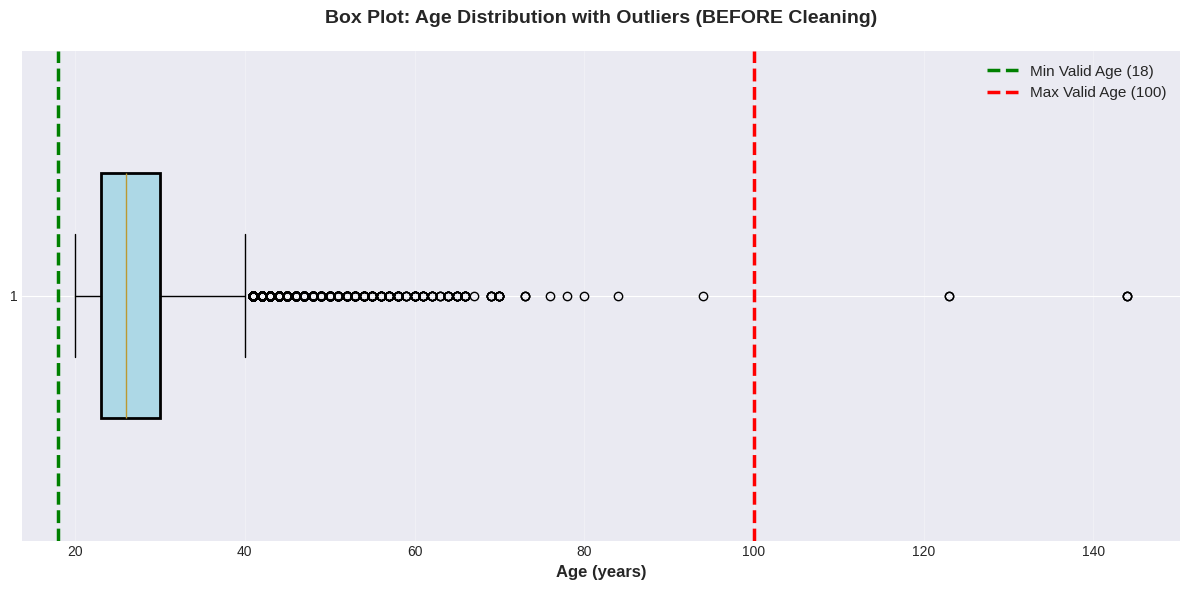


💡 Observation: We can see outliers beyond our valid range (18-100 years)


In [12]:
# Box plot showing outliers
plt.figure(figsize=(12, 6))
box = plt.boxplot(df['person_age'], vert=False, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightblue')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)

plt.axvline(18, color='green', linestyle='--', linewidth=2.5, label='Min Valid Age (18)')
plt.axvline(100, color='red', linestyle='--', linewidth=2.5, label='Max Valid Age (100)')
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Age Distribution with Outliers (BEFORE Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Observation: We can see outliers beyond our valid range (18-100 years)")

### Plot 5: Histogram of Age (BEFORE Cleaning)

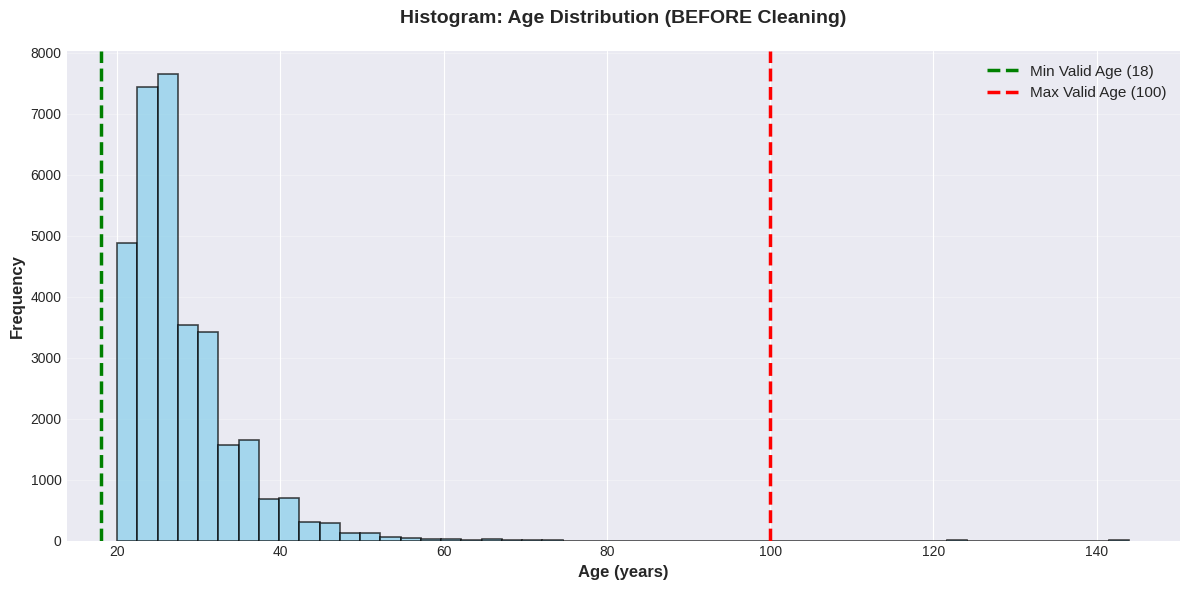


💡 Observation: Most data is concentrated between 18-100, but there are outliers


In [13]:
# Histogram of all ages
plt.figure(figsize=(12, 6))
plt.hist(df['person_age'], bins=50, color='skyblue', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.axvline(18, color='green', linestyle='--', linewidth=2.5, label='Min Valid Age (18)')
plt.axvline(100, color='red', linestyle='--', linewidth=2.5, label='Max Valid Age (100)')
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Histogram: Age Distribution (BEFORE Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Observation: Most data is concentrated between 18-100, but there are outliers")

### Plot 6: Cumulative Distribution of Age (BEFORE Cleaning)

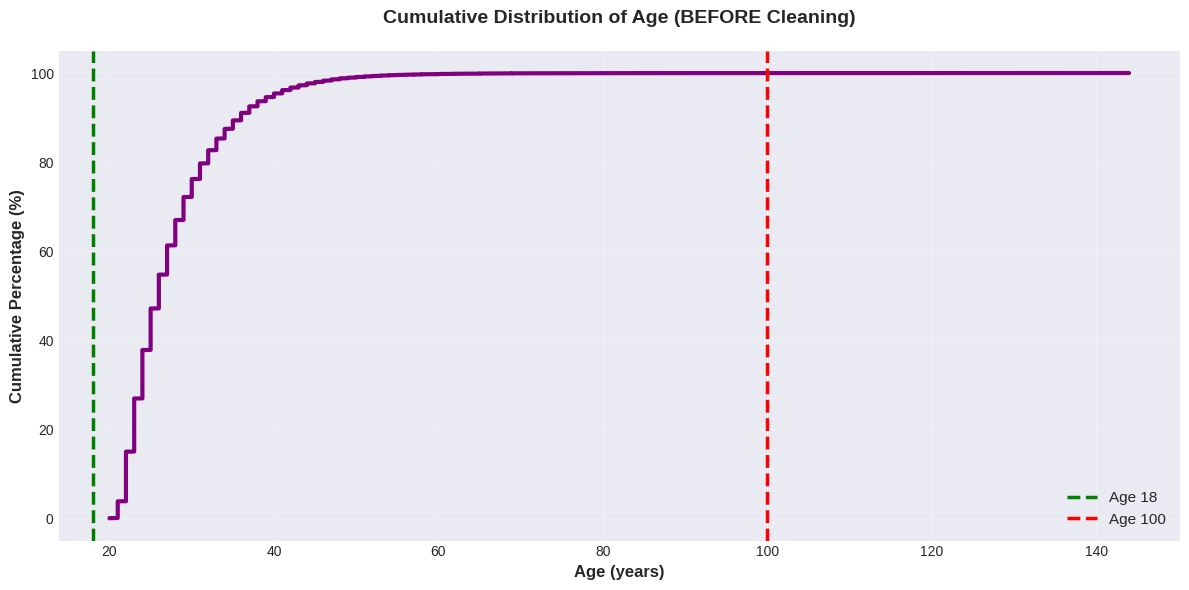


💡 99.98% of data falls within the valid age range (18-100)


In [14]:
# Cumulative distribution
ages_sorted = np.sort(df['person_age'])
cumulative = np.arange(1, len(ages_sorted) + 1) / len(ages_sorted) * 100

plt.figure(figsize=(12, 6))
plt.plot(ages_sorted, cumulative, linewidth=3, color='purple')
plt.axvline(18, color='green', linestyle='--', linewidth=2.5, label='Age 18')
plt.axvline(100, color='red', linestyle='--', linewidth=2.5, label='Age 100')
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Percentage (%)', fontsize=12, fontweight='bold')
plt.title('Cumulative Distribution of Age (BEFORE Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate percentage within valid range
valid_age_pct = (len(df[(df['person_age'] >= 18) & (df['person_age'] <= 100)]) / len(df)) * 100
print(f"\n💡 {valid_age_pct:.2f}% of data falls within the valid age range (18-100)")

---
---
# 🔧 STEP 5: REMOVE AGE OUTLIERS
---

## Why remove these records?
- **Legal Constraint**: Credit products are for adults (18+)
- **Data Quality**: Ages > 100 are likely data entry errors
- **Business Logic**: These ages don't represent our target population
- **Model Performance**: Outliers can negatively impact predictions

## Why 18-100 range?
- **18 years**: Legal adult age in most countries
- **100 years**: Realistic upper limit (covers 99.9% of valid cases)
- This is a **domain-based decision**, not a statistical one

In [15]:
# Remove age outliers
rows_before = len(df)
df = df[(df["person_age"] >= 18) & (df["person_age"] <= 100)]
rows_after = len(df)
rows_removed = rows_before - rows_after

print(f"✅ AGE CLEANING COMPLETED!")
print(f"="*60)
print(f"   Rows before cleaning: {rows_before:,}")
print(f"   Rows after cleaning:  {rows_after:,}")
print(f"   Rows removed:         {rows_removed:,}")
print(f"   Percentage removed:   {(rows_removed/rows_before)*100:.2f}%")
print(f"   New age range:        {df['person_age'].min()} to {df['person_age'].max()} years")

✅ AGE CLEANING COMPLETED!
   Rows before cleaning: 32,581
   Rows after cleaning:  32,576
   Rows removed:         5
   Percentage removed:   0.02%
   New age range:        20 to 94 years


### Plot 7: Box Plot of Age (AFTER Cleaning)

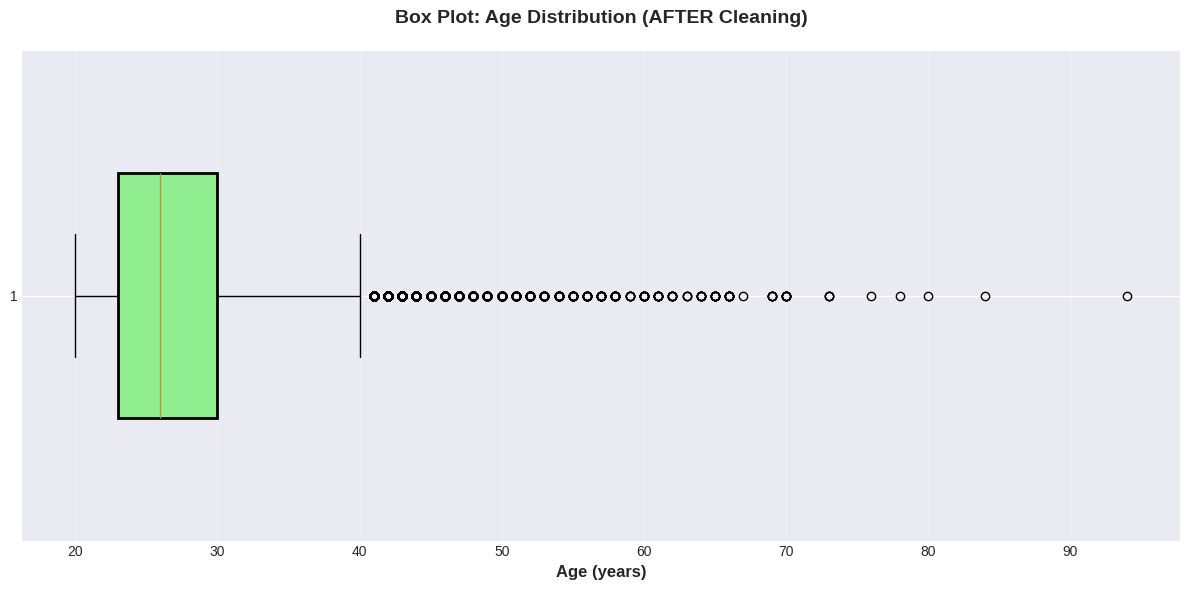


✅ All outliers removed! Age distribution is now clean.


In [16]:
# Box plot after cleaning
plt.figure(figsize=(12, 6))
box = plt.boxplot(df['person_age'], vert=False, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightgreen')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)

plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Age Distribution (AFTER Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ All outliers removed! Age distribution is now clean.")

### Plot 8: Histogram of Age (AFTER Cleaning)

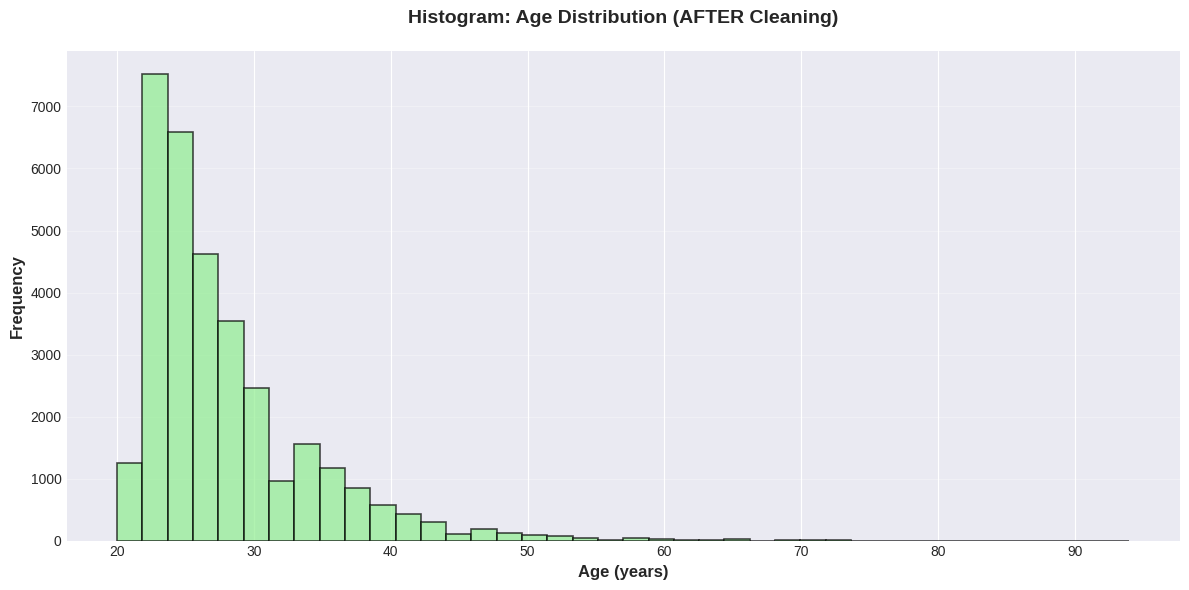


✅ Clean distribution with valid age range (18-100 years)


In [17]:
# Histogram after cleaning
plt.figure(figsize=(12, 6))
plt.hist(df['person_age'], bins=40, color='lightgreen', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Histogram: Age Distribution (AFTER Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Clean distribution with valid age range (18-100 years)")

---
---
# 🔍 STEP 6: ANALYZE LOAN AMOUNT
---

## Why analyze loan amount?
- Loan amount is a key predictor in credit risk models
- Extreme values can:
  - Skew our statistical analyses
  - Negatively impact model training
  - Represent data entry errors
- We need to identify and handle outliers properly

In [18]:
# Analyze loan amount before cleaning
print("Loan Amount Analysis (BEFORE Cleaning):")
print("="*60)
print(df['loan_amnt'].describe())

# Calculate IQR boundaries
Q1 = df["loan_amnt"].quantile(0.25)
Q3 = df["loan_amnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n📊 IQR Method Calculations:")
print(f"   Q1 (25th percentile):        ${Q1:,.2f}")
print(f"   Q3 (75th percentile):        ${Q3:,.2f}")
print(f"   IQR (Q3 - Q1):               ${IQR:,.2f}")
print(f"   Lower Bound (Q1 - 1.5×IQR):  ${lower_bound:,.2f}")
print(f"   Upper Bound (Q3 + 1.5×IQR):  ${upper_bound:,.2f}")

# Count outliers
outliers_low = len(df[df['loan_amnt'] < lower_bound])
outliers_high = len(df[df['loan_amnt'] > upper_bound])
total_outliers = outliers_low + outliers_high

print(f"\n🔍 Outlier Detection:")
print(f"   Values below lower bound: {outliers_low}")
print(f"   Values above upper bound: {outliers_high}")
print(f"   Total outliers:           {total_outliers} ({(total_outliers/len(df))*100:.2f}%)")

Loan Amount Analysis (BEFORE Cleaning):
count    32576.000000
mean      9589.117755
std       6321.886846
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

📊 IQR Method Calculations:
   Q1 (25th percentile):        $5,000.00
   Q3 (75th percentile):        $12,200.00
   IQR (Q3 - Q1):               $7,200.00
   Lower Bound (Q1 - 1.5×IQR):  $-5,800.00
   Upper Bound (Q3 + 1.5×IQR):  $23,000.00

🔍 Outlier Detection:
   Values below lower bound: 0
   Values above upper bound: 1689
   Total outliers:           1689 (5.18%)


### What is the IQR Method?

**IQR (Interquartile Range)** is a robust statistical method for detecting outliers:

- **Q1**: 25th percentile (25% of data is below this value)
- **Q3**: 75th percentile (75% of data is below this value)
- **IQR = Q3 - Q1**: The middle 50% of the data

**Outlier boundaries**:
- Lower: Q1 - 1.5 × IQR
- Upper: Q3 + 1.5 × IQR

**Why use IQR instead of Z-score?**
- ✅ Doesn't assume normal distribution
- ✅ Robust to extreme values
- ✅ Works well with skewed financial data
- ❌ Z-score assumes normal distribution
- ❌ Z-score is sensitive to outliers

### Plot 9: Box Plot of Loan Amount (BEFORE Clipping)

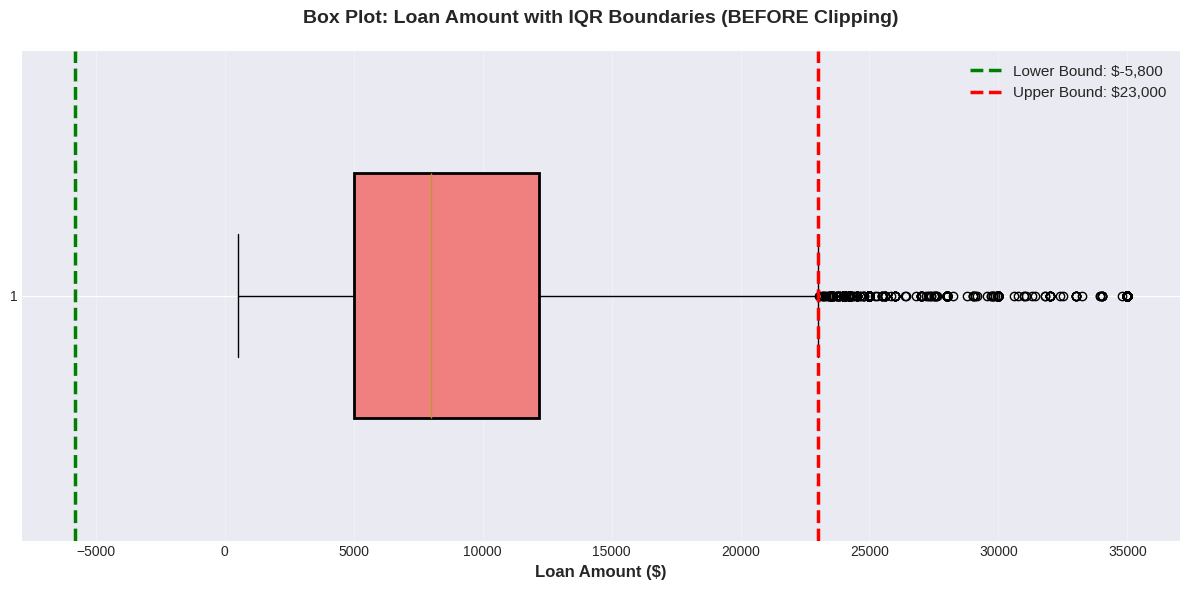


💡 The box shows Q1 to Q3 (middle 50% of data)
💡 Dots outside boundaries are outliers


In [19]:
# Box plot with IQR boundaries
plt.figure(figsize=(12, 6))
box = plt.boxplot(df['loan_amnt'], vert=False, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightcoral')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)

plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2.5,
            label=f'Lower Bound: ${lower_bound:,.0f}')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2.5,
            label=f'Upper Bound: ${upper_bound:,.0f}')
plt.xlabel('Loan Amount ($)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Loan Amount with IQR Boundaries (BEFORE Clipping)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 The box shows Q1 to Q3 (middle 50% of data)")
print(f"💡 Dots outside boundaries are outliers")

### Plot 10: Histogram of Loan Amount (BEFORE Clipping)

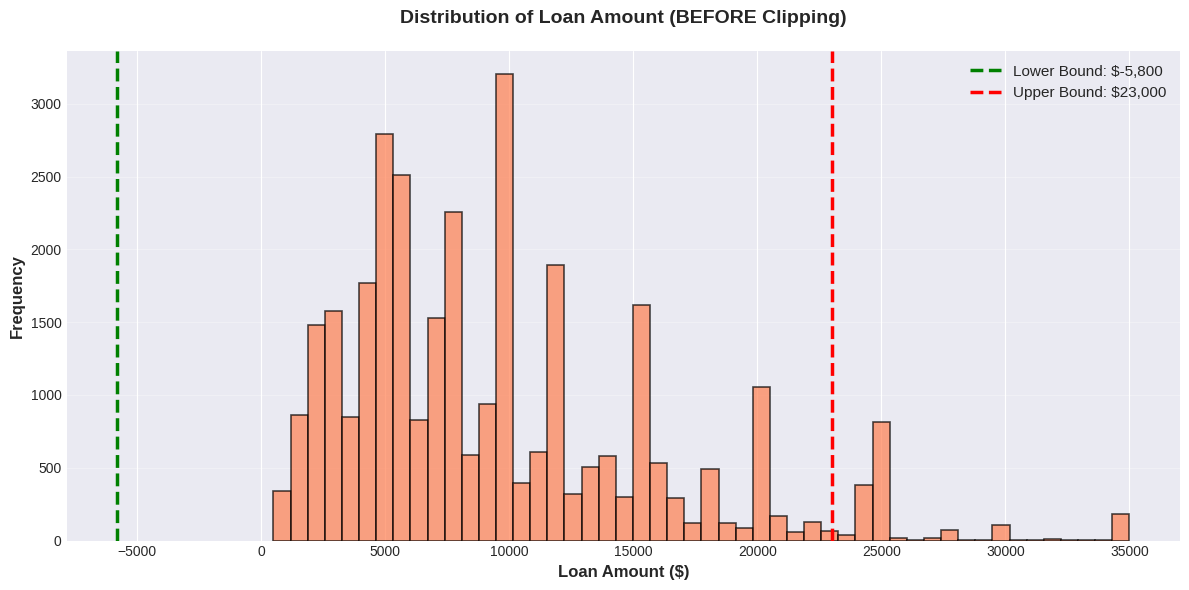


💡 Notice the extreme values extending beyond our boundaries


In [20]:
# Store original values for comparison
loan_amnt_original = df['loan_amnt'].copy()

# Histogram before clipping
plt.figure(figsize=(12, 6))
plt.hist(df['loan_amnt'], bins=50, color='coral', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2.5,
            label=f'Lower Bound: ${lower_bound:,.0f}')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2.5,
            label=f'Upper Bound: ${upper_bound:,.0f}')
plt.xlabel('Loan Amount ($)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Loan Amount (BEFORE Clipping)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Notice the extreme values extending beyond our boundaries")

---
---
# 🔧 STEP 7: CLIP LOAN AMOUNT OUTLIERS
---

## Why CLIPPING instead of REMOVAL?

**Clipping** means capping values at the boundaries:
- Values below lower_bound → set to lower_bound
- Values above upper_bound → set to upper_bound

**Why is this better than removing?**
- ✅ Preserves all data points (important for training)
- ✅ Maintains sample size
- ✅ Reduces impact of extremes without losing information
- ✅ Keeps the relationships in the data
- ❌ Removing would lose valuable information
- ❌ Removing could reduce model performance

In [21]:
# Apply clipping
df["loan_amnt"] = df["loan_amnt"].clip(lower=lower_bound, upper=upper_bound)

values_clipped_low = (loan_amnt_original < lower_bound).sum()
values_clipped_high = (loan_amnt_original > upper_bound).sum()
total_clipped = values_clipped_low + values_clipped_high

print(f"✅ LOAN AMOUNT CLIPPING COMPLETED!")
print(f"="*60)
print(f"   Values clipped at lower bound: {values_clipped_low}")
print(f"   Values clipped at upper bound: {values_clipped_high}")
print(f"   Total values clipped:          {total_clipped} ({(total_clipped/len(df))*100:.2f}%)")
print(f"   New range:                     ${df['loan_amnt'].min():,.2f} to ${df['loan_amnt'].max():,.2f}")
print(f"\n💡 No data points were removed, only capped at boundaries!")

✅ LOAN AMOUNT CLIPPING COMPLETED!
   Values clipped at lower bound: 0
   Values clipped at upper bound: 1689
   Total values clipped:          1689 (5.18%)
   New range:                     $500.00 to $23,000.00

💡 No data points were removed, only capped at boundaries!


### Plot 11: Box Plot of Loan Amount (AFTER Clipping)

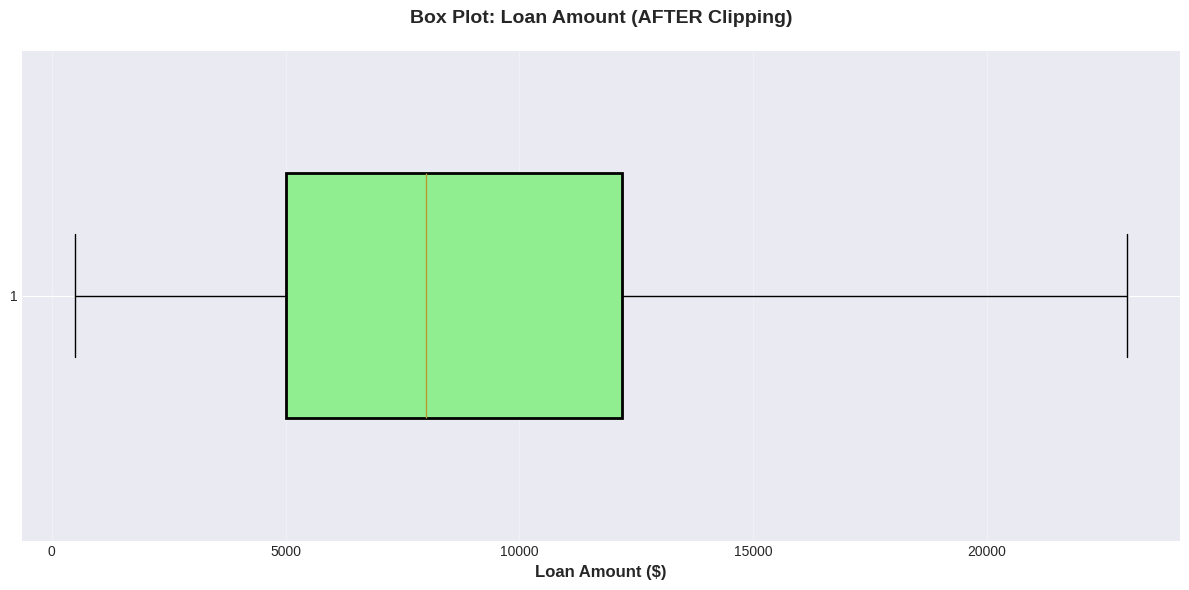


✅ No extreme outliers visible! Data is now within reasonable bounds.


In [22]:
# Box plot after clipping
plt.figure(figsize=(12, 6))
box = plt.boxplot(df['loan_amnt'], vert=False, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightgreen')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)

plt.xlabel('Loan Amount ($)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Loan Amount (AFTER Clipping)',
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ No extreme outliers visible! Data is now within reasonable bounds.")

### Plot 12: Histogram of Loan Amount (AFTER Clipping)

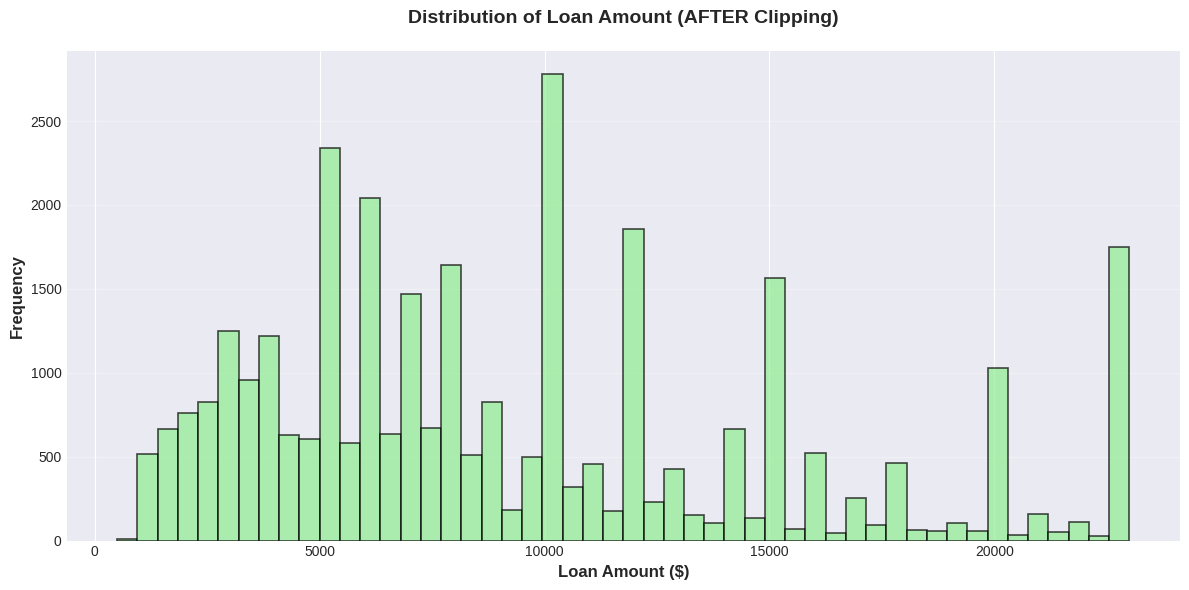


✅ Distribution is now more concentrated and reasonable


In [23]:
# Histogram after clipping
plt.figure(figsize=(12, 6))
plt.hist(df['loan_amnt'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xlabel('Loan Amount ($)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Loan Amount (AFTER Clipping)',
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Distribution is now more concentrated and reasonable")

### Plot 13: BEFORE vs AFTER Comparison

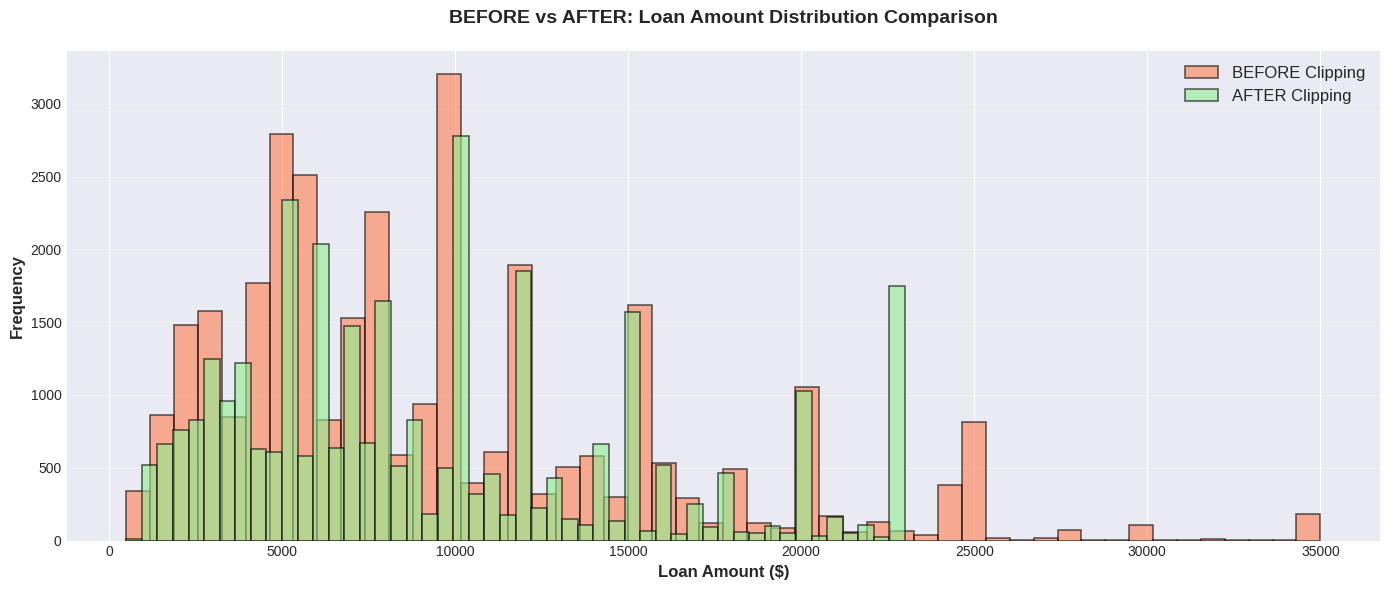


💡 Notice how the extreme tails have been brought in
💡 The main shape of the distribution is preserved


In [24]:
# Comparison plot
plt.figure(figsize=(14, 6))
plt.hist(loan_amnt_original, bins=50, alpha=0.6, color='coral',
         label='BEFORE Clipping', edgecolor='black', linewidth=1.2)
plt.hist(df['loan_amnt'], bins=50, alpha=0.6, color='lightgreen',
         label='AFTER Clipping', edgecolor='black', linewidth=1.2)
plt.xlabel('Loan Amount ($)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('BEFORE vs AFTER: Loan Amount Distribution Comparison',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Notice how the extreme tails have been brought in")
print(f"💡 The main shape of the distribution is preserved")

### Statistical Comparison

In [25]:
# Compare statistics
print("\n" + "="*60)
print("STATISTICAL COMPARISON: BEFORE vs AFTER Clipping")
print("="*60)

comparison_df = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Range'],
    'BEFORE Clipping': [
        f"${loan_amnt_original.mean():,.2f}",
        f"${loan_amnt_original.median():,.2f}",
        f"${loan_amnt_original.std():,.2f}",
        f"${loan_amnt_original.min():,.2f}",
        f"${loan_amnt_original.max():,.2f}",
        f"${loan_amnt_original.max() - loan_amnt_original.min():,.2f}"
    ],
    'AFTER Clipping': [
        f"${df['loan_amnt'].mean():,.2f}",
        f"${df['loan_amnt'].median():,.2f}",
        f"${df['loan_amnt'].std():,.2f}",
        f"${df['loan_amnt'].min():,.2f}",
        f"${df['loan_amnt'].max():,.2f}",
        f"${df['loan_amnt'].max() - df['loan_amnt'].min():,.2f}"
    ]
})

print(comparison_df.to_string(index=False))
print(f"\n💡 Notice how Standard Deviation decreased (less spread in the data)")
print(f"💡 Range is now more reasonable for modeling")


STATISTICAL COMPARISON: BEFORE vs AFTER Clipping
 Metric BEFORE Clipping AFTER Clipping
   Mean       $9,589.12      $9,407.40
 Median       $8,000.00      $8,000.00
Std Dev       $6,321.89      $5,812.73
    Min         $500.00        $500.00
    Max      $35,000.00     $23,000.00
  Range      $34,500.00     $22,500.00

💡 Notice how Standard Deviation decreased (less spread in the data)
💡 Range is now more reasonable for modeling


---
---
# 🔧 STEP 8: RENAME COLUMNS FOR CLARITY
---

## Why rename columns?
- **Clarity**: Adding units ($) makes the data self-documenting
- **Best Practice**: Financial columns should indicate currency
- **User Experience**: Makes reports and visualizations clearer
- **Documentation**: Reduces confusion for other analysts

In [26]:
# Rename columns
print("Column Renaming:")
print("="*60)
print("\nBEFORE:")
print(f"  • loan_amnt")
print(f"  • person_income")

df.rename(columns={"loan_amnt": "loan_amnt($)"}, inplace=True)
df.rename(columns={"person_income": "person_income($)"}, inplace=True)

print("\nAFTER:")
print(f"  • loan_amnt($)")
print(f"  • person_income($)")

print("\n✅ Column names updated with currency units!")
print("\n💡 This makes it immediately clear what the units are")

Column Renaming:

BEFORE:
  • loan_amnt
  • person_income

AFTER:
  • loan_amnt($)
  • person_income($)

✅ Column names updated with currency units!

💡 This makes it immediately clear what the units are


---
---
# 🔍 STEP 9: ANALYZE EMPLOYMENT LENGTH
---

## Why analyze employment length?
- Employment stability is important for credit risk assessment
- We need to check for:
  - **Missing values** that need to be filled
  - **Unrealistic values** (e.g., 100+ years of employment)
  - **Data quality issues**

In [27]:
# Analyze employment length before cleaning
print("Employment Length Analysis (BEFORE Cleaning):")
print("="*60)
print(df['person_emp_length'].describe())

print(f"\n📊 Key Findings:")
print(f"   Missing values:   {df['person_emp_length'].isnull().sum()}")
print(f"   Values > 60 years: {len(df[df['person_emp_length'] > 60])}")
print(f"   Maximum value:     {df['person_emp_length'].max():.1f} years")
print(f"   Minimum value:     {df['person_emp_length'].min():.1f} years")

Employment Length Analysis (BEFORE Cleaning):
count    31681.000000
mean         4.789527
std          4.142706
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

📊 Key Findings:
   Missing values:   895
   Values > 60 years: 2
   Maximum value:     123.0 years
   Minimum value:     0.0 years


### Why is 60 years a reasonable upper limit?

- **Typical working life**: 18 to 75 years = ~57 years maximum
- **Retirement age**: Most people retire by 65-70
- **Realistic constraint**: 60 years covers nearly all valid cases
- **Values > 60**: Likely data entry errors or outliers

### Plot 14: Box Plot of Employment Length (BEFORE Cleaning)

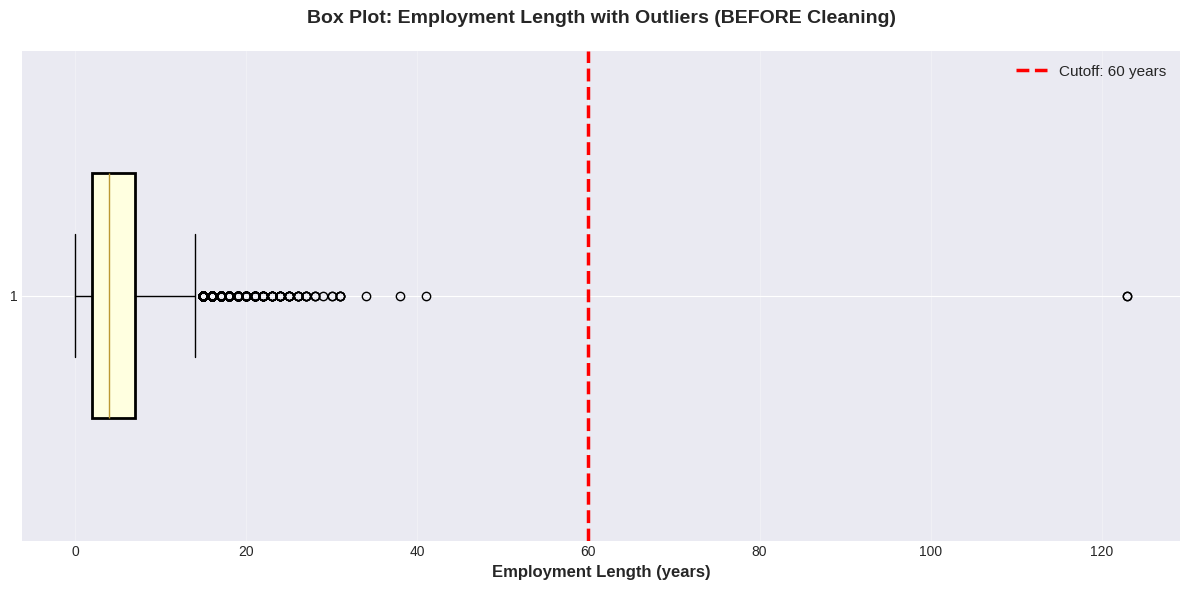


💡 Notice the outliers extending beyond 60 years


In [28]:
# Store original values
emp_length_original = df['person_emp_length'].copy()

# Box plot showing outliers
valid_emp = df['person_emp_length'].dropna()

plt.figure(figsize=(12, 6))
box = plt.boxplot(valid_emp, vert=False, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightyellow')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)

plt.axvline(60, color='red', linestyle='--', linewidth=2.5, label='Cutoff: 60 years')
plt.xlabel('Employment Length (years)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Employment Length with Outliers (BEFORE Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Notice the outliers extending beyond 60 years")

### Plot 15: Histogram of Employment Length (BEFORE Cleaning)

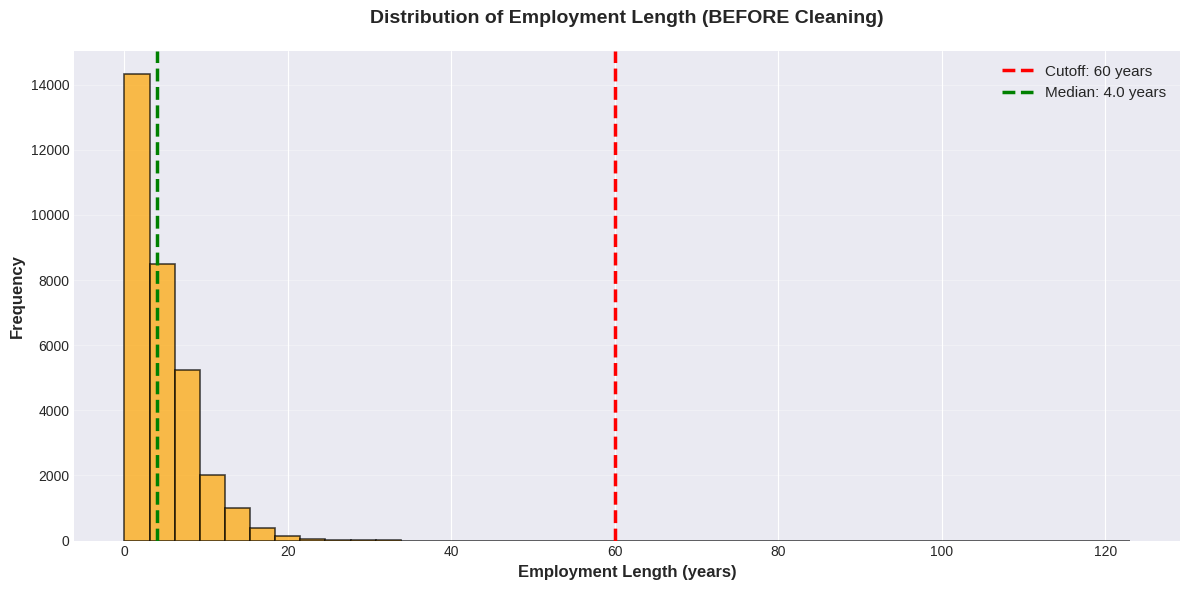


💡 Most data is concentrated in the 0-40 year range
💡 Median is around 4.0 years - we'll use this for imputation


In [29]:
# Histogram before cleaning
plt.figure(figsize=(12, 6))
plt.hist(valid_emp, bins=40, color='orange', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.axvline(60, color='red', linestyle='--', linewidth=2.5, label='Cutoff: 60 years')
plt.axvline(valid_emp.median(), color='green', linestyle='--', linewidth=2.5,
           label=f'Median: {valid_emp.median():.1f} years')
plt.xlabel('Employment Length (years)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Employment Length (BEFORE Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Most data is concentrated in the 0-40 year range")
print(f"💡 Median is around {valid_emp.median():.1f} years - we'll use this for imputation")

---
---
# 🔧 STEP 10: CLEAN EMPLOYMENT LENGTH
---

## Two operations:
1. **Clip** values > 60 years to 60
2. **Impute** missing values with median

## Why use median for imputation?
- Employment length is typically **skewed** (not normal)
- **Median** is robust to outliers
- Median represents a "typical" employment duration
- Better than mean for skewed distributions

In [30]:
# Apply clipping and imputation
df["person_emp_length"] = df["person_emp_length"].clip(upper=60)
median_value = df["person_emp_length"].median()
missing_emp_count = df["person_emp_length"].isnull().sum()
df["person_emp_length"].fillna(median_value, inplace=True)

values_clipped = (emp_length_original > 60).sum()

print(f"✅ EMPLOYMENT LENGTH CLEANING COMPLETED!")
print(f"="*60)
print(f"   Values clipped at 60 years:                {values_clipped}")
print(f"   Missing values imputed with median:        {missing_emp_count}")
print(f"   Median value used for imputation:          {median_value:.1f} years")
print(f"   Verification: Missing values remaining:    {df['person_emp_length'].isnull().sum()}")

✅ EMPLOYMENT LENGTH CLEANING COMPLETED!
   Values clipped at 60 years:                2
   Missing values imputed with median:        895
   Median value used for imputation:          4.0 years
   Verification: Missing values remaining:    0


/tmp/ipython-input-1835208212.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(median_value, inplace=True)


### Plot 16: Box Plot of Employment Length (AFTER Cleaning)

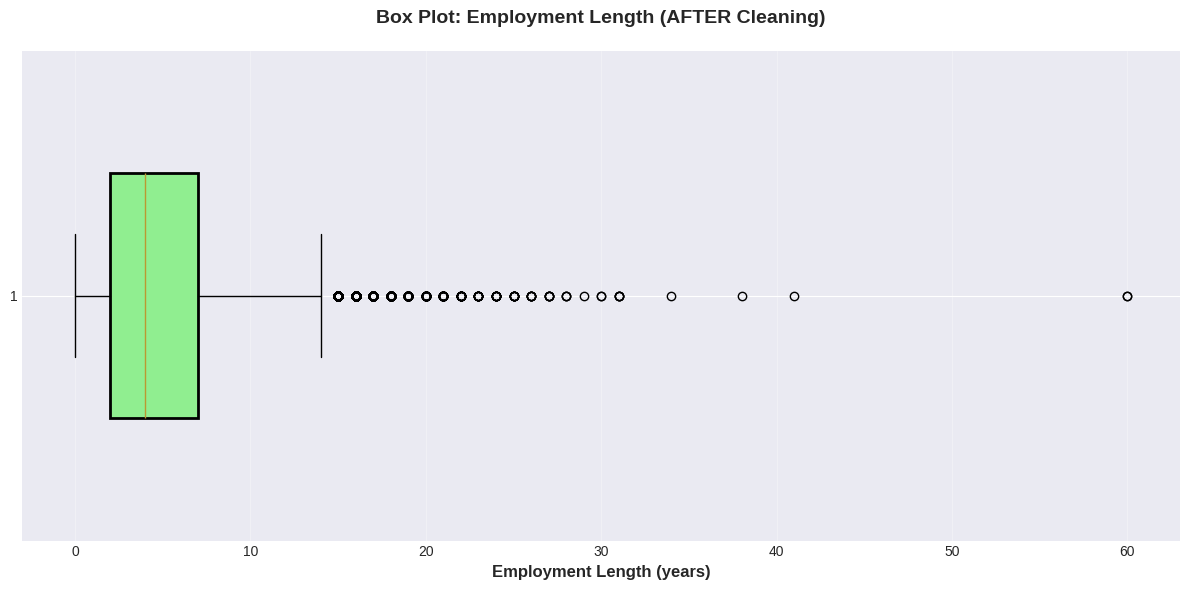


✅ No extreme outliers! Maximum is now capped at 60 years.


In [31]:
# Box plot after cleaning
plt.figure(figsize=(12, 6))
box = plt.boxplot(df['person_emp_length'], vert=False, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightgreen')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)

plt.xlabel('Employment Length (years)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Employment Length (AFTER Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ No extreme outliers! Maximum is now capped at 60 years.")

### Plot 17: Histogram of Employment Length (AFTER Cleaning)

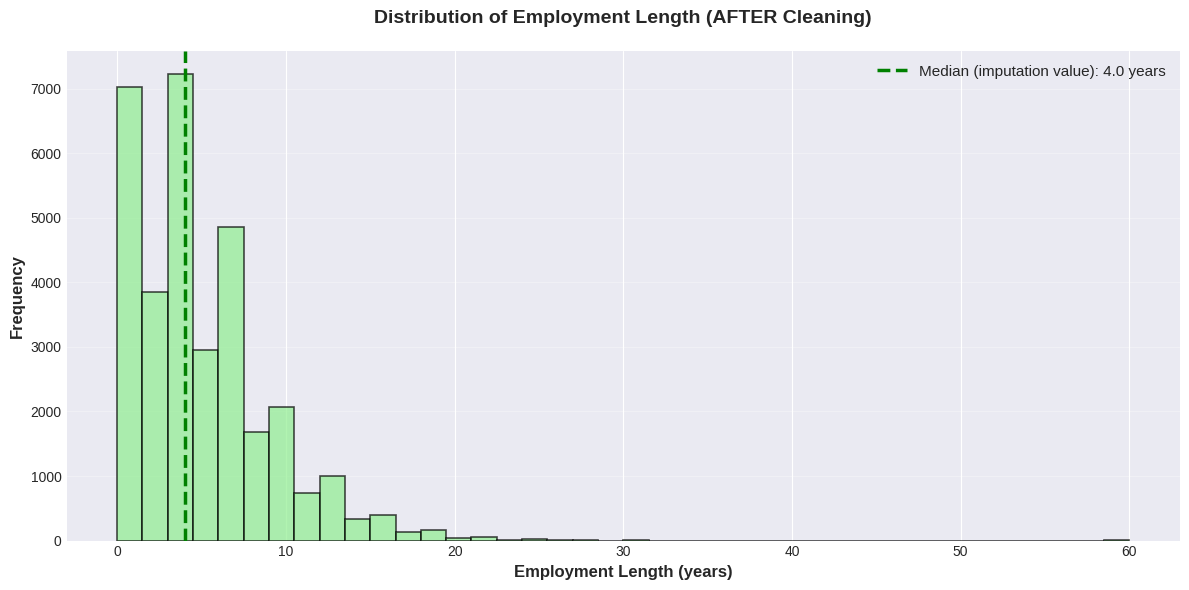


✅ Clean distribution with no missing values!
✅ All values within reasonable range (0-60 years)


In [32]:
# Histogram after cleaning
plt.figure(figsize=(12, 6))
plt.hist(df['person_emp_length'], bins=40, color='lightgreen', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.axvline(median_value, color='green', linestyle='--', linewidth=2.5,
           label=f'Median (imputation value): {median_value:.1f} years')
plt.xlabel('Employment Length (years)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Employment Length (AFTER Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Clean distribution with no missing values!")
print(f"✅ All values within reasonable range (0-60 years)")

### Plot 18: BEFORE vs AFTER Comparison

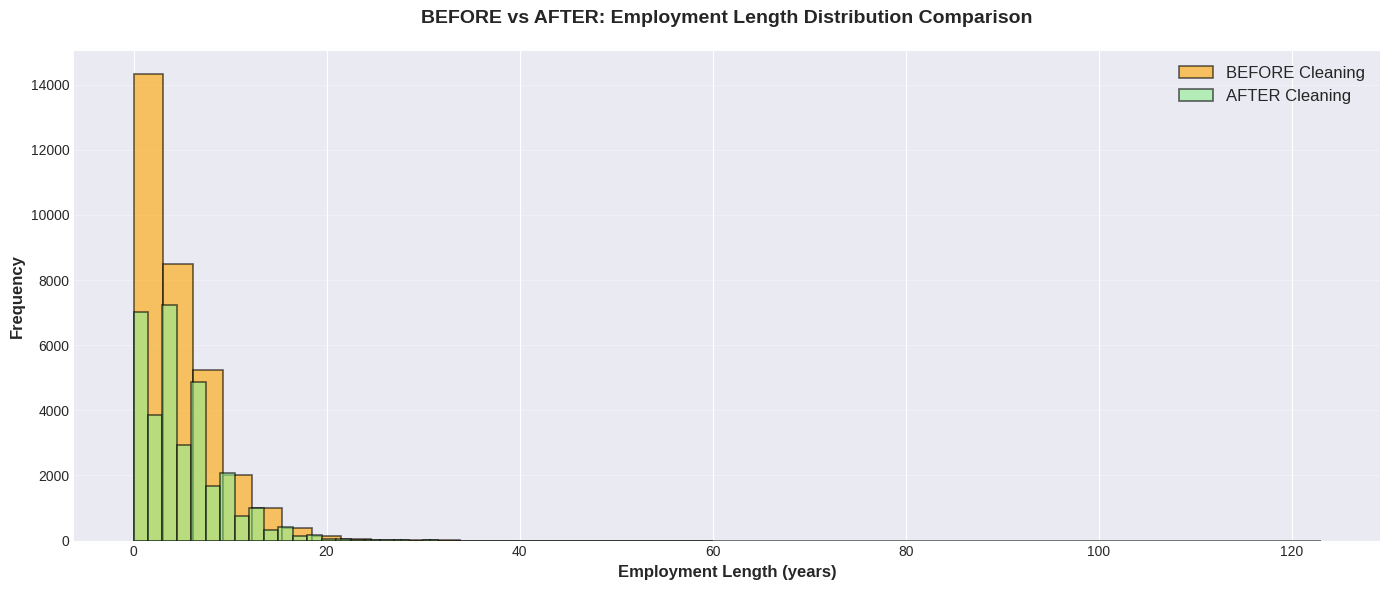


💡 Notice the spike at median value (imputed missing values)
💡 Extreme values beyond 60 years have been capped


In [33]:
# Comparison plot
plt.figure(figsize=(14, 6))
plt.hist(emp_length_original.dropna(), bins=40, alpha=0.6, color='orange',
         label='BEFORE Cleaning', edgecolor='black', linewidth=1.2)
plt.hist(df['person_emp_length'], bins=40, alpha=0.6, color='lightgreen',
         label='AFTER Cleaning', edgecolor='black', linewidth=1.2)
plt.xlabel('Employment Length (years)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('BEFORE vs AFTER: Employment Length Distribution Comparison',
         fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Notice the spike at median value (imputed missing values)")
print(f"💡 Extreme values beyond 60 years have been capped")

### Statistical Comparison

In [34]:
# Compare statistics
print("\n" + "="*60)
print("STATISTICAL COMPARISON: BEFORE vs AFTER Cleaning")
print("="*60)

emp_original_valid = emp_length_original.dropna()

comparison_df = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Missing'],
    'BEFORE Cleaning': [
        f"{len(emp_original_valid):,}",
        f"{emp_original_valid.mean():.2f} years",
        f"{emp_original_valid.median():.2f} years",
        f"{emp_original_valid.std():.2f} years",
        f"{emp_original_valid.min():.2f} years",
        f"{emp_original_valid.max():.2f} years",
        f"{emp_length_original.isnull().sum()}"
    ],
    'AFTER Cleaning': [
        f"{len(df['person_emp_length']):,}",
        f"{df['person_emp_length'].mean():.2f} years",
        f"{df['person_emp_length'].median():.2f} years",
        f"{df['person_emp_length'].std():.2f} years",
        f"{df['person_emp_length'].min():.2f} years",
        f"{df['person_emp_length'].max():.2f} years",
        f"{df['person_emp_length'].isnull().sum()}"
    ]
})

print(comparison_df.to_string(index=False))
print(f"\n💡 Count increased (missing values were filled)")
print(f"💡 Maximum is now capped at 60 years")
print(f"💡 No missing values remaining!")


STATISTICAL COMPARISON: BEFORE vs AFTER Cleaning
 Metric BEFORE Cleaning AFTER Cleaning
  Count          31,681         32,576
   Mean      4.79 years     4.76 years
 Median      4.00 years     4.00 years
Std Dev      4.14 years     4.00 years
    Min      0.00 years     0.00 years
    Max    123.00 years    60.00 years
Missing             895              0

💡 Count increased (missing values were filled)
💡 Maximum is now capped at 60 years
💡 No missing values remaining!


---
---
# 📊 STEP 11: FINAL DATA QUALITY ASSESSMENT
---

In [35]:
# Final verification of missing values
print("\n" + "="*60)
print("FINAL MISSING VALUES CHECK")
print("="*60)
missing_final = df.isnull().sum()
print(missing_final)
print(f"\n✅ Total missing values: {missing_final.sum()}")
if missing_final.sum() == 0:
    print("\n🎉 PERFECT! No missing values in the entire dataset!")


FINAL MISSING VALUES CHECK
person_age                    0
person_income($)              0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt($)                  0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

✅ Total missing values: 0

🎉 PERFECT! No missing values in the entire dataset!


### Plot 19: Data Completeness Summary

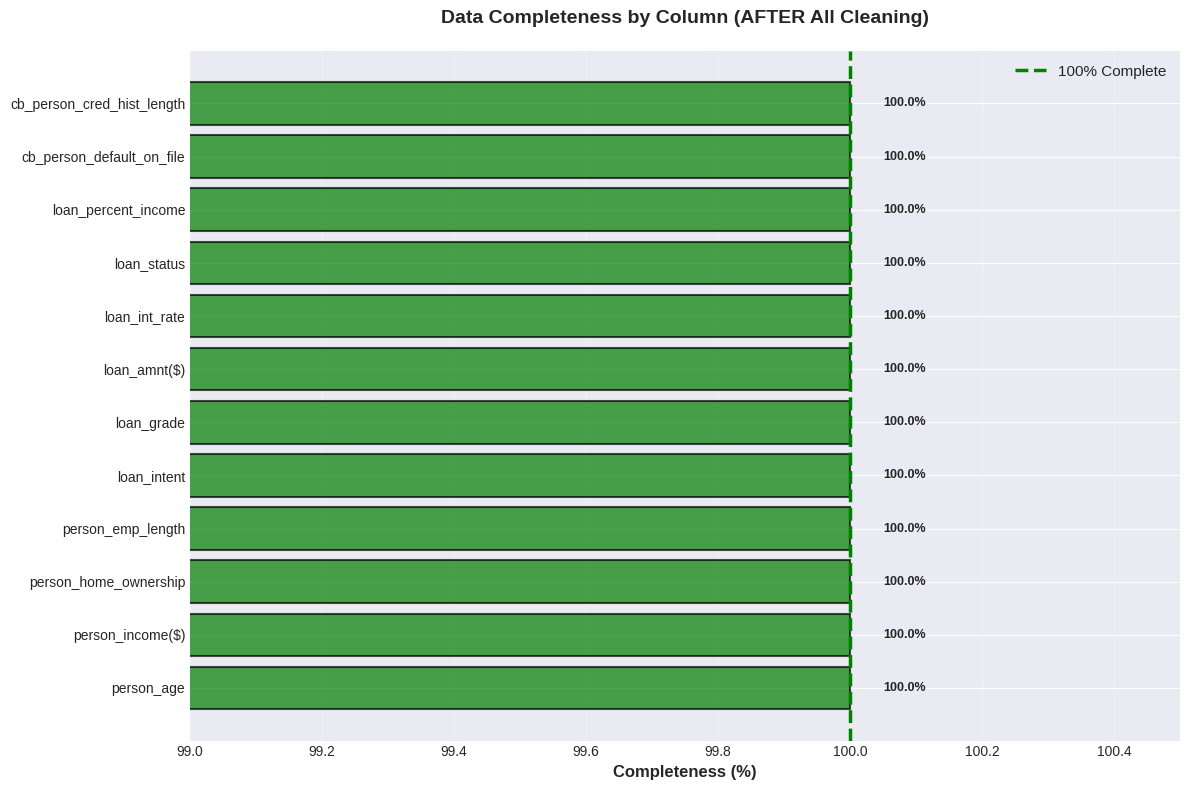


✅ All columns are 100% complete!


In [36]:
# Data completeness visualization
completeness = (1 - df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(12, 8))
colors = ['green' if x == 100 else 'orange' for x in completeness]
plt.barh(range(len(completeness)), completeness.values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.yticks(range(len(completeness)), completeness.index, fontsize=10)
plt.xlabel('Completeness (%)', fontsize=12, fontweight='bold')
plt.title('Data Completeness by Column (AFTER All Cleaning)',
         fontsize=14, fontweight='bold', pad=20)
plt.xlim([99, 100.5])
plt.axvline(100, color='green', linestyle='--', linewidth=2.5, label='100% Complete')
plt.legend(fontsize=11)
plt.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(completeness.values):
    plt.text(v + 0.05, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n✅ All columns are 100% complete!")

### Plot 20: Overall Dataset Summary - Final Distributions

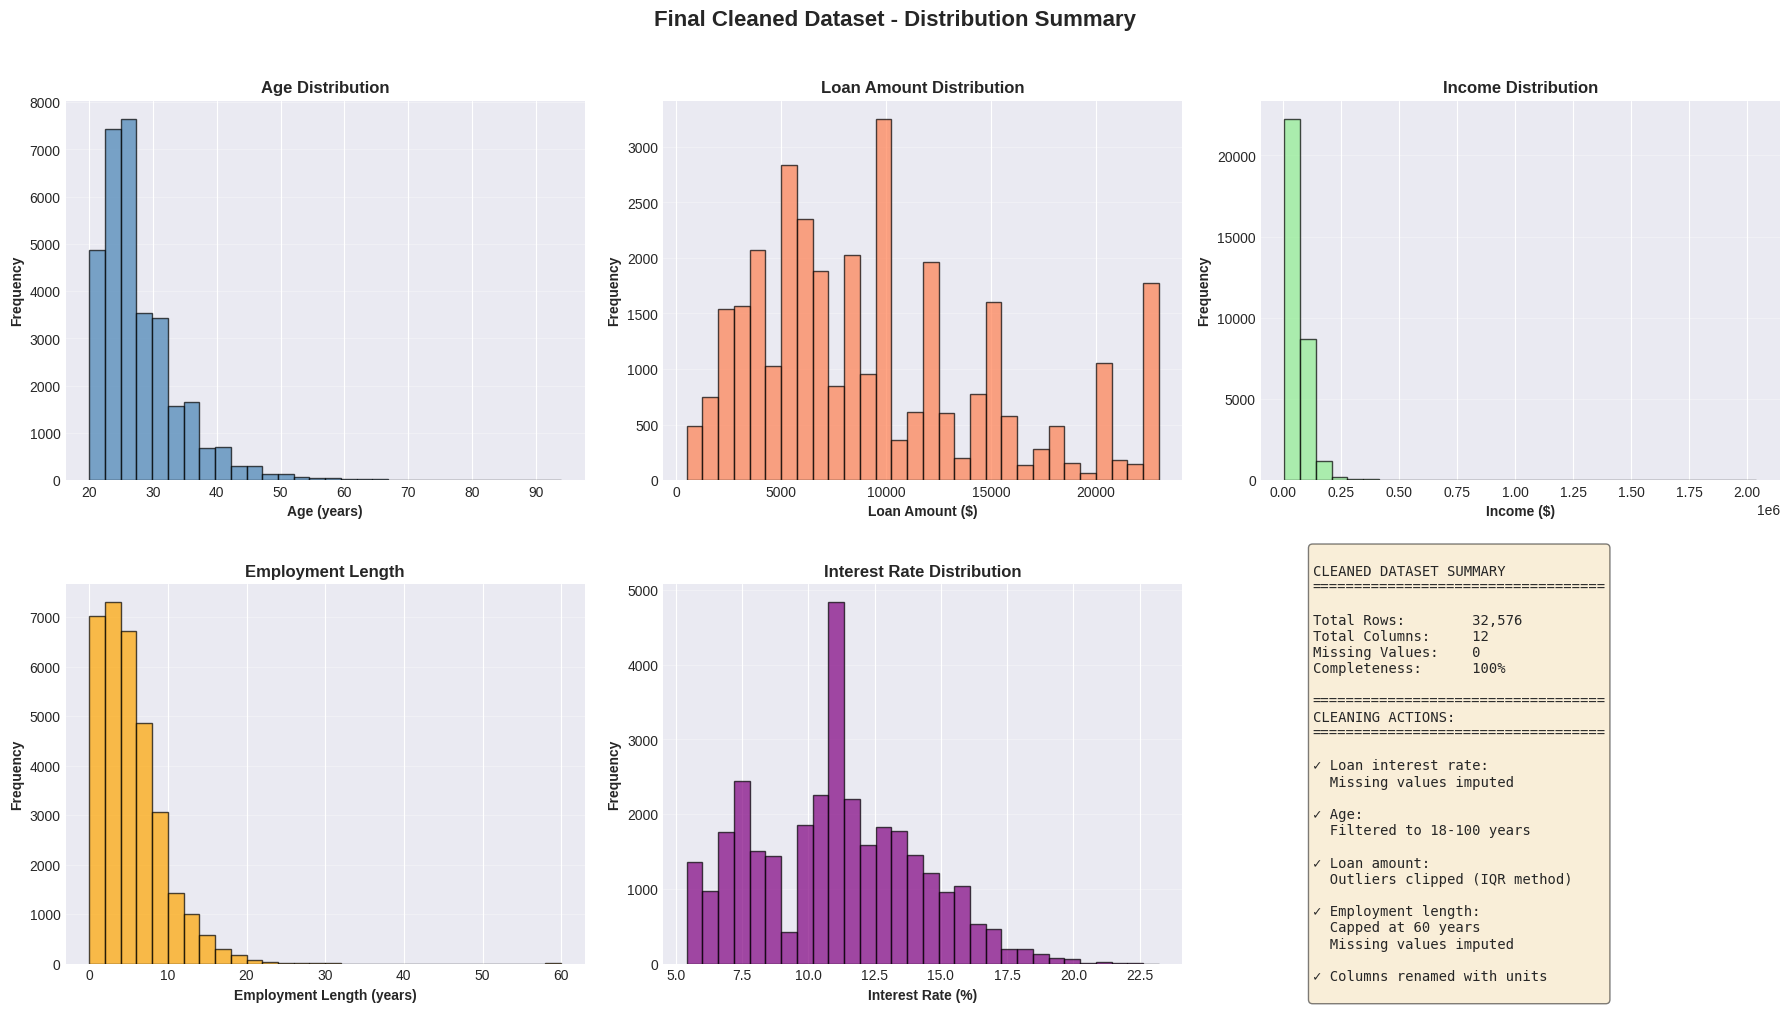


✅ All distributions look healthy and ready for modeling!


In [37]:
# Create a comprehensive final summary plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Final Cleaned Dataset - Distribution Summary', fontsize=16, fontweight='bold', y=1.02)

# Plot 1: Age
axes[0, 0].hist(df['person_age'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Age (years)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Age Distribution', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Loan Amount
axes[0, 1].hist(df['loan_amnt($)'], bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Loan Amount ($)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Loan Amount Distribution', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Income
axes[0, 2].hist(df['person_income($)'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 2].set_xlabel('Income ($)', fontweight='bold')
axes[0, 2].set_ylabel('Frequency', fontweight='bold')
axes[0, 2].set_title('Income Distribution', fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# Plot 4: Employment Length
axes[1, 0].hist(df['person_emp_length'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Employment Length (years)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Employment Length', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 5: Interest Rate
axes[1, 1].hist(df['loan_int_rate'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Interest Rate (%)', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Interest Rate Distribution', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

# Plot 6: Summary Statistics Table
axes[1, 2].axis('off')
summary_text = f"""
CLEANED DATASET SUMMARY
{'='*35}

Total Rows:        {len(df):,}
Total Columns:     {len(df.columns)}
Missing Values:    {df.isnull().sum().sum()}
Completeness:      100%

{'='*35}
CLEANING ACTIONS:
{'='*35}

✓ Loan interest rate:
  Missing values imputed

✓ Age:
  Filtered to 18-100 years

✓ Loan amount:
  Outliers clipped (IQR method)

✓ Employment length:
  Capped at 60 years
  Missing values imputed

✓ Columns renamed with units
"""
axes[1, 2].text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
               verticalalignment='center', bbox=dict(boxstyle='round',
               facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✅ All distributions look healthy and ready for modeling!")

---
---
# 📈 FINAL SUMMARY: ORIGINAL vs CLEANED DATASET
---

In [38]:
# Load original dataset for comparison
df_original_reload = pd.read_csv(csv_path)

print("\n" + "="*80)
print("COMPREHENSIVE CLEANING SUMMARY")
print("="*80)

summary_data = {
    'Metric': [
        'Total Rows',
        'Total Columns',
        'Missing Values',
        'Data Completeness',
        'Age Range',
        'Loan Amount Range',
        'Emp Length Range'
    ],
    'ORIGINAL Dataset': [
        f"{len(df_original_reload):,}",
        len(df_original_reload.columns),
        df_original_reload.isnull().sum().sum(),
        f"{(1 - df_original_reload.isnull().sum().sum() / (len(df_original_reload) * len(df_original_reload.columns))) * 100:.2f}%",
        f"{df_original_reload['person_age'].min():.0f} - {df_original_reload['person_age'].max():.0f} years",
        f"${df_original_reload['loan_amnt'].min():,.0f} - ${df_original_reload['loan_amnt'].max():,.0f}",
        f"{df_original_reload['person_emp_length'].min():.0f} - {df_original_reload['person_emp_length'].max():.0f} years"
    ],
    'CLEANED Dataset': [
        f"{len(df):,}",
        len(df.columns),
        df.isnull().sum().sum(),
        f"{(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%",
        f"{df['person_age'].min():.0f} - {df['person_age'].max():.0f} years",
        f"${df['loan_amnt($)'].min():,.0f} - ${df['loan_amnt($)'].max():,.0f}",
        f"{df['person_emp_length'].min():.0f} - {df['person_emp_length'].max():.0f} years"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

rows_removed = len(df_original_reload) - len(df)
retention_rate = (len(df)/len(df_original_reload))*100

print(f"\n{'='*80}")
print(f"DATA RETENTION:")
print(f"{'='*80}")
print(f"  Rows removed:        {rows_removed:,} ({((rows_removed)/len(df_original_reload))*100:.2f}%)")
print(f"  Data retention rate: {retention_rate:.2f}%")
print(f"\n{'='*80}")
print(f"✅ Dataset is now CLEAN and READY for Machine Learning!")
print(f"{'='*80}")


COMPREHENSIVE CLEANING SUMMARY

           Metric ORIGINAL Dataset CLEANED Dataset
       Total Rows           32,581          32,576
    Total Columns               12              12
   Missing Values             4011               0
Data Completeness           98.97%         100.00%
        Age Range   20 - 144 years   20 - 94 years
Loan Amount Range   $500 - $35,000  $500 - $23,000
 Emp Length Range    0 - 123 years    0 - 60 years

DATA RETENTION:
  Rows removed:        5 (0.02%)
  Data retention rate: 99.98%

✅ Dataset is now CLEAN and READY for Machine Learning!


---
---
# 💾 STEP 12: SAVE CLEANED DATASET
---

In [39]:
# Save the cleaned dataset
output_path = "cleaned_credit_risk.csv"
df.to_csv(output_path, index=False)

print("\n" + "="*80)
print("DATASET SAVED SUCCESSFULLY!")
print("="*80)
print(f"\n✅ File: {output_path}")
print(f"✅ Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"✅ Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n{'='*80}")
print(f"🎉 Cleaned dataset is ready for modeling!")
print(f"{'='*80}")


DATASET SAVED SUCCESSFULLY!

✅ File: cleaned_credit_risk.csv
✅ Shape: 32,576 rows × 12 columns
✅ Size: 8.87 MB

🎉 Cleaned dataset is ready for modeling!


In [40]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

---
---
# 📚 KEY TAKEAWAYS
---

## What Did We Do?

### 1. **Loan Interest Rate** (Missing Values)
   - **Problem**: Missing values
   - **Solution**: Median imputation
   - **Why**: Robust to outliers in skewed financial data

### 2. **Age** (Outliers)
   - **Problem**: Ages < 18 and > 100
   - **Solution**: Filter to 18-100 range
   - **Why**: Domain-based business logic

### 3. **Loan Amount** (Outliers)
   - **Problem**: Extreme values affecting distribution
   - **Solution**: IQR-based clipping
   - **Why**: Preserve data while handling outliers

### 4. **Employment Length** (Outliers + Missing)
   - **Problem**: Values > 60 years, missing data
   - **Solution**: Cap at 60, median imputation
   - **Why**: Realistic constraints + robust imputation

### 5. **Column Naming** (Clarity)
   - **Problem**: Unclear units
   - **Solution**: Added ($) to financial columns
   - **Why**: Self-documenting data

## Why These Methods?

- ✅ **Preservation over Deletion**: Clipped instead of removed
- ✅ **Robustness**: Used median and IQR (resistant to outliers)
- ✅ **Domain Knowledge**: Applied business rules
- ✅ **Data Integrity**: Maintained sample size
- ✅ **Statistical Soundness**: Used appropriate methods for data types

## Results

- ✅ **Zero missing values**
- ✅ **All outliers handled appropriately**
- ✅ **High data retention rate**
- ✅ **Clean, consistent distributions**
- ✅ **Ready for machine learning models**